Esse trabalho é uma parte do Desafio Final do BootCamp de Pyhton do IGTI.
Nesse projeto final, foi pedido para criar diferentes modelos para realizar a previsão da Diabetes, com base na base de dados de paciente com e sem Diabetes.
Após, rodar os três modelos(KNN, árvore de Decisão e MLP) irei avaliar o que teve a melhor resposta.
Como próxima etapa desse projeto, irei criar uma aplicação em flask para realizar o Deploy do modelo que apresentar a melhor resposta nesse notebook.

In [1]:
#Carregando as bibliotecas iniciais e a base de dados
import pandas as pd
import matplotlib.pyplot as plt

df_diabetes=pd.read_csv('Base-diabetes.csv')


In [2]:
#Visualizando os primeiros elementos dessa base de dados
df_diabetes.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [3]:
# Colocando o nome das colunas do Dados
df_diabetes.columns=['Num. Gravid','Conc. Glicose','Pressao Diast.','Dobra Cut.','Insulina','IMC','Historic','Idade','Result']
###Result ---> 0 Não e  1 Sim
print(df_diabetes.head())

   Num. Gravid  Conc. Glicose  Pressao Diast.  Dobra Cut.  Insulina   IMC  \
0            1             85              66          29         0  26.6   
1            8            183              64           0         0  23.3   
2            1             89              66          23        94  28.1   
3            0            137              40          35       168  43.1   
4            5            116              74           0         0  25.6   

   Historic  Idade  Result  
0     0.351     31       0  
1     0.672     32       1  
2     0.167     21       0  
3     2.288     33       1  
4     0.201     30       0  


Agora irei começar a fazer uma análise das informações contidas nessa base de dados, primeiramente irei verificar:
-1: Os tipos de dados;
-2: Verificar a existencia de zeros e NaN
-3: Avaliar possiveis insconsistencias no Dataset

In [4]:
##########################################################
########## Analise exploratoria do modelo ################
##########################################################
###### Verificando os tipos de dados no Dataset ##########
##########################################################
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Num. Gravid     767 non-null    int64  
 1   Conc. Glicose   767 non-null    int64  
 2   Pressao Diast.  767 non-null    int64  
 3   Dobra Cut.      767 non-null    int64  
 4   Insulina        767 non-null    int64  
 5   IMC             767 non-null    float64
 6   Historic        767 non-null    float64
 7   Idade           767 non-null    int64  
 8   Result          767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
##########################################################
########## Analise exploratoria do modelo ################
##########################################################
##### Verificando a existencia de Zeros e NaN  ##########
##########################################################
df_diabetes.isnull().sum()

Num. Gravid       0
Conc. Glicose     0
Pressao Diast.    0
Dobra Cut.        0
Insulina          0
IMC               0
Historic          0
Idade             0
Result            0
dtype: int64

In [6]:
##########################################################
########## Analise exploratoria do modelo ################
##########################################################
###### Verificando Inconsistencias no Dataset   ##########
##########################################################
print(df_diabetes.describe())

       Num. Gravid  Conc. Glicose  Pressao Diast.  Dobra Cut.    Insulina  \
count   767.000000     767.000000      767.000000  767.000000  767.000000   
mean      3.842243     120.859192       69.101695   20.517601   79.903520   
std       3.370877      31.978468       19.368155   15.954059  115.283105   
min       0.000000       0.000000        0.000000    0.000000    0.000000   
25%       1.000000      99.000000       62.000000    0.000000    0.000000   
50%       3.000000     117.000000       72.000000   23.000000   32.000000   
75%       6.000000     140.000000       80.000000   32.000000  127.500000   
max      17.000000     199.000000      122.000000   99.000000  846.000000   

              IMC    Historic       Idade      Result  
count  767.000000  767.000000  767.000000  767.000000  
mean    31.990482    0.471674   33.219035    0.348110  
std      7.889091    0.331497   11.752296    0.476682  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.300000    0.243

Analisnando as informações estatisticas do nosso data set, podemos inferir que não temos uma inconsistencia de dados, pois esses valores são possiveis de ocorrer.

In [7]:
##########################################################
########## Analise Correspondencia do modelo #############
##########################################################

df_diabetes.corr()

,Num. Gravid,Conc. Glicose,Pressao Diast.,Dobra Cut.,Insulina,IMC,Historic,Idade,Result
Num. Gravid,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
Conc. Glicose,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
Pressao Diast.,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
Dobra Cut.,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
Insulina,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
IMC,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
Historic,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
Idade,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
Result,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000


Analisnando preliminarmente a matriz de correspondencia do modelo podemos inferir que a priori a "Pressão Diast." e a "Dobra Cut." não possuem um correlação muito grande com o paciente ter ou não diabetes

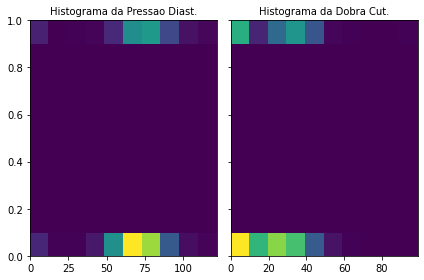

In [8]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist2d(df_diabetes['Pressao Diast.'],df_diabetes['Result']);
axs[0].set_title('Histograma da Pressao Diast.', fontsize=10)

axs[1].hist2d(df_diabetes['Dobra Cut.'],df_diabetes['Result']);
axs[1].set_title('Histograma da Dobra Cut.', fontsize=10);

Como já era de se esperar, visto pela matriz de correlação, não podemos tirar uma conclusão sobre a doença olhando somente para a Pressao Diast. e nem para a Dobra Cut.

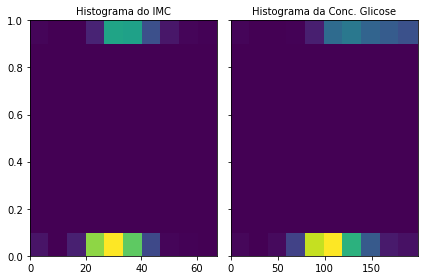

In [9]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist2d(df_diabetes['IMC'],df_diabetes['Result']);
axs[0].set_title('Histograma do IMC', fontsize=10)

axs[1].hist2d(df_diabetes['Conc. Glicose'],df_diabetes['Result']);
axs[1].set_title('Histograma da Conc. Glicose', fontsize=10);




Como vitso na matriz de correlação e no histogramas acima, temos variaveis que são mais impactantes para a classificação do paciente do que as outras.
Para melhorar essa visualização e facilitar a sua interpretação, iremos separar esse Dataset em dois dataset diferentes, sendo um apenas com pacientes que são doentes e os outros não 

In [10]:
##########################################################
##### Criando um base só com Pessoas Diabeticas  #########
##########################################################

df_diabetes_com=df_diabetes.loc[df_diabetes['Result']==1]

##########################################################
##### Criando um base só com Pessoas Sem Diabeticas  #####
##########################################################

df_diabetes_sem=df_diabetes.loc[df_diabetes['Result']==0]


Agora iremos analisar se nosso dataset esta balanceado, com isso ja podemos ter uma noção de qual métrica de avaliação iremos utilizar para avaliar nosso modelo.

In [11]:
df_diabetes_com.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267 entries, 1 to 765
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Num. Gravid     267 non-null    int64  
 1   Conc. Glicose   267 non-null    int64  
 2   Pressao Diast.  267 non-null    int64  
 3   Dobra Cut.      267 non-null    int64  
 4   Insulina        267 non-null    int64  
 5   IMC             267 non-null    float64
 6   Historic        267 non-null    float64
 7   Idade           267 non-null    int64  
 8   Result          267 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 20.9 KB


In [12]:
df_diabetes_sem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 766
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Num. Gravid     500 non-null    int64  
 1   Conc. Glicose   500 non-null    int64  
 2   Pressao Diast.  500 non-null    int64  
 3   Dobra Cut.      500 non-null    int64  
 4   Insulina        500 non-null    int64  
 5   IMC             500 non-null    float64
 6   Historic        500 non-null    float64
 7   Idade           500 non-null    int64  
 8   Result          500 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 39.1 KB


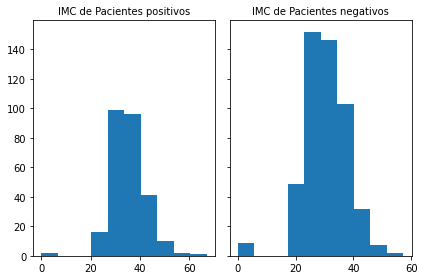

In [13]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(df_diabetes_com['IMC'])
axs[0].set_title('IMC de Pacientes positivos', fontsize=10)

axs[1].hist(df_diabetes_sem['IMC'])
axs[1].set_title('IMC de Pacientes negativos', fontsize=10);

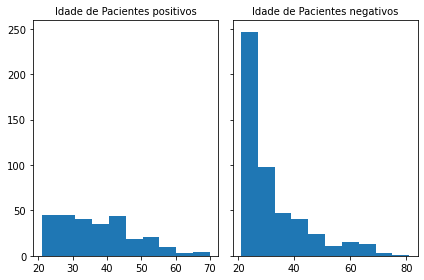

In [14]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(df_diabetes_com['Idade'])
axs[0].set_title('Idade de Pacientes positivos', fontsize=10)

axs[1].hist(df_diabetes_sem['Idade'])
axs[1].set_title('Idade de Pacientes negativos', fontsize=10);

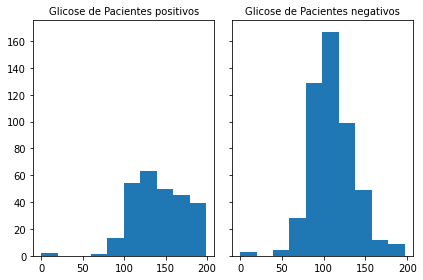

In [15]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(df_diabetes_com['Conc. Glicose'])
axs[0].set_title('Glicose de Pacientes positivos', fontsize=10)

axs[1].hist(df_diabetes_sem['Conc. Glicose'])
axs[1].set_title('Glicose de Pacientes negativos', fontsize=10);


Nessa parte do código iremos rodar três diferentes modelos de classificação (KNN, Random Forest, e MLP), não irei fazer nenhum tipo de filtro nos dados ou balanceamento na base, mesmo sabendo que precisamos uma vez que temos mais casos de paciente com diabetes do que sem.

A primeira etapa vai ser a divisão em dados de entrada e dados target, seguido da normalização dos dados de entrada, que são as caracteristicas avaliadas para fazer a classificação.
Por fim iremos fazer a divisão dos dados de treino e teste. Vale alterar diferentes valores do random_state utilizados para evitar análises tendenciosas

In [17]:
#carregando as bibliotecas necessárias para dividir os dados e normalizar os mesmos

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [18]:
normaliza = MinMaxScaler() #objeto para a normalização

In [19]:
#transforma os dados em array
entradas= df_diabetes.iloc[:, :-1].values  #dados de entrada
saida= df_diabetes.iloc[:, 8].values  # saídas ou target

In [20]:
entradas_normalizadas=normaliza.fit_transform(entradas)

In [21]:
X_train, X_test, y_train, y_test =train_test_split(entradas_normalizadas, saida, test_size=0.30,random_state=42)

Agora iremos começar a aplicação do modelo de KNN, utilizando 5 vizinhos para fazer a classificação

In [22]:
#aplicando o método do KNN
#treina o modelo 
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=5)#utiliza a construção por meio de 5 vizinhos
clf_KNN.fit(X_train, y_train) # aplica a classificação

KNeighborsClassifier()

In [23]:
#realiza a previsão
y_pred = clf_KNN.predict(X_test)

Agora iremos exibir a matriz de confusão e o report de classificação desse modelo. Como nosso modelo esta desbalanceado iremos avaliar sua eficiencia pela acurácia e pelo F1-score

In [24]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[127  24]
 [ 44  36]]
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       151
           1       0.60      0.45      0.51        80

    accuracy                           0.71       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.69      0.71      0.69       231



In [ ]:
#Exibindo o report do modelo para avaliar o modelo criado
print(classification_report(y_test, y_pred))

In [25]:
#Avaliando agora por meio de uma arvore de Decisão
from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão

In [26]:
# Cria o objeto de classificação através do 
clf_arvore = DecisionTreeClassifier(random_state=1)

# Realiza o treinamento do classificador
clf_arvore = clf_arvore.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf_arvore.predict(X_test)

In [27]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[117  34]
 [ 31  49]]
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       151
           1       0.59      0.61      0.60        80

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



In [ ]:
#Exibindo o report do modelo para avaliar o modelo criado
print(classification_report(y_test, y_pred))

In [28]:
#definição da biblioteca
from sklearn.neural_network import MLPClassifier
#Algoritmo Rede MLP
clf_mlp = MLPClassifier(solver="lbfgs", alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1,max_iter=1000)
#Realiza o treinamento do classificador
clf_mlp= clf_mlp.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf_mlp.predict(X_test)

In [29]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))


[[130  21]
 [ 32  48]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       151
           1       0.70      0.60      0.64        80

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



In [ ]:
#Exibindo o report do modelo para avaliar o modelo criado
print(classification_report(y_test, y_pred))